<a href="https://colab.research.google.com/github/cuboid0223/Deep-Generative-Models/blob/main/CNN_Handwriting_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model,model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
#讀取資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
#CNN的輸入為(長,寬,色彩) 1代表黑白 3代表彩色
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
#正規化圖像
x_train = x_train/255
x_test = x_test/255

In [7]:
#將label轉換為label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
#建構網路
model = Sequential()

In [9]:
#CNN輸入為28*28*1
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))

In [10]:
#池化層
model.add(MaxPooling2D(pool_size = 2))
#攤平
model.add(Flatten())
#全連接層
model.add(Dense(16, activation = 'relu'))
#輸出層
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 25s 52ms/step - loss: 0.3800 - accuracy: 0.8909 - val_loss: 0.1564 - val_accuracy: 0.9539
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 0.1241 - accuracy: 0.9643 - val_loss: 0.0948 - val_accuracy: 0.9715
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0860 - accuracy: 0.9750 - val_loss: 0.0734 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0686 - accuracy: 0.9797 - val_loss: 0.0660 - val_accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0632 - val_accuracy: 0.9783
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0661 - val_accuracy: 0.9788
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0560 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
#儲存model(包含網路)
model.save('model.keras')
#讀取整個model
model = load_model('model.keras')
#只儲存權重
model.save_weights('model_weights.keras')

In [14]:
#需重新定義網路
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape = (28,28,1),padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
#讀取權重
model.load_weights('model_weights.keras')

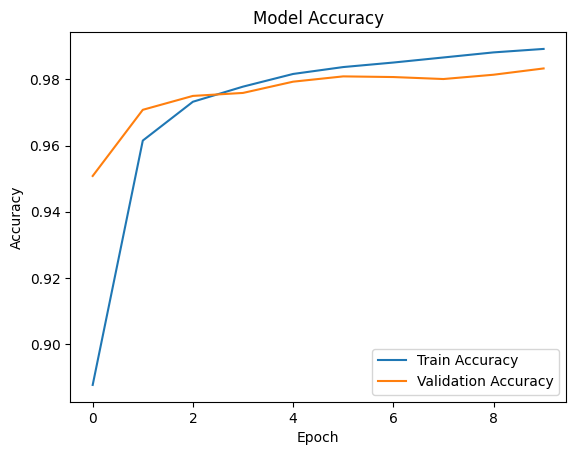

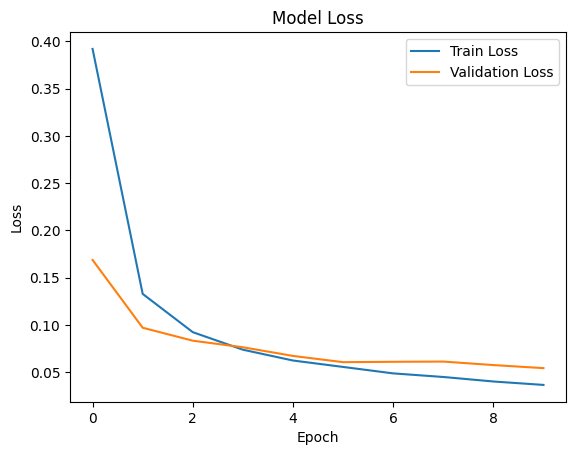

In [ ]:
# 绘制训练和验证准确率
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制训练和验证损失
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()